<a href="https://colab.research.google.com/github/diazonic/Machine-Learning-using-sklearn/blob/master/Pandas_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# def parse(x):
#     return pd.to_datetime(x, format='%d-%m-%Y %H:%M')

In [ ]:
pgen1 = pd.read_csv('./Power Data/Plant_1_Generation_Data.csv',
                  delimiter=',',
                  header=0)

Let's check what we got

In [ ]:
pgen1.head(800)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6183645.000
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.000000,0.000000,0.000000,6987759.000
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,0.000000,7602960.000
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.000000,0.000000,0.000000,7158964.000
...,...,...,...,...,...,...,...
795,15-05-2020 09:15,4135001,1IF53ai7Xc0U56Y,3541.000000,347.985714,946.571429,6184591.571
796,15-05-2020 09:15,4135001,3PZuoBAID5Wc2HD,3170.142857,311.385714,929.285714,6988688.286
797,15-05-2020 09:15,4135001,7JYdWkrLSPkdwr4,3592.285714,352.857143,903.285714,7603863.286
798,15-05-2020 09:15,4135001,McdE0feGgRqW7Ca,5938.000000,581.825000,939.250000,7159903.250


In [ ]:
pgen1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
DATE_TIME      68778 non-null object
PLANT_ID       68778 non-null int64
SOURCE_KEY     68778 non-null object
DC_POWER       68778 non-null float64
AC_POWER       68778 non-null float64
DAILY_YIELD    68778 non-null float64
TOTAL_YIELD    68778 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


Date doesnt look right.

In [ ]:
pgen1['DATE_TIME'] = pd.to_datetime(pgen1['DATE_TIME'],format='%d-%m-%Y %H:%M')

In [ ]:
pgen1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
DATE_TIME      68778 non-null datetime64[ns]
PLANT_ID       68778 non-null int64
SOURCE_KEY     68778 non-null object
DC_POWER       68778 non-null float64
AC_POWER       68778 non-null float64
DAILY_YIELD    68778 non-null float64
TOTAL_YIELD    68778 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
pgen1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME,HOUR,MINUTES
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00,0,0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00,0,0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00,0,0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00,0,0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00,0,0


while we are at it... lets split the date and time. This will help us with the analysis later. e.g. if we want to group all entries for a date.

In [ ]:
pgen1['DATE'] = pgen1['DATE_TIME'].apply(lambda x:x.date())
pgen1['TIME'] = pgen1['DATE_TIME'].apply(lambda x:x.time())

In [ ]:
pgen1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 9 columns):
DATE_TIME      68778 non-null datetime64[ns]
PLANT_ID       68778 non-null int64
SOURCE_KEY     68778 non-null object
DC_POWER       68778 non-null float64
AC_POWER       68778 non-null float64
DAILY_YIELD    68778 non-null float64
TOTAL_YIELD    68778 non-null float64
DATE           68778 non-null object
TIME           68778 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 4.7+ MB


The DATE column is an object again! Lets convert it to a datetime format.

In [ ]:
pgen1['DATE'] = pd.to_datetime(pgen1['DATE'],format='%Y-%m-%d')
pgen1['HOUR'] = pd.to_datetime(pgen1['TIME'], format='%H:%M:%S').dt.hour
pgen1['MINUTES'] = pd.to_datetime(pgen1['TIME'], format='%H:%M:%S').dt.minute

In [ ]:
pgen1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 11 columns):
DATE_TIME      68778 non-null datetime64[ns]
PLANT_ID       68778 non-null int64
SOURCE_KEY     68778 non-null object
DC_POWER       68778 non-null float64
AC_POWER       68778 non-null float64
DAILY_YIELD    68778 non-null float64
TOTAL_YIELD    68778 non-null float64
DATE           68778 non-null datetime64[ns]
TIME           68778 non-null object
HOUR           68778 non-null int64
MINUTES        68778 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 5.8+ MB


Now that we have done some basic formating, lets look at what data we have..

In [ ]:
pgen1.head()

In [ ]:
#pgen1['SOURCE_KEY'].unique()
len(pgen1['SOURCE_KEY'].unique())

22

In [ ]:
pgen1['SOURCE_KEY'].value_counts()

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
VHMLBKoKgIrUVDU    3133
7JYdWkrLSPkdwr4    3133
ih0vzX44oOqAx2f    3130
ZnxXDlPa8U1GXgE    3130
wCURE6d3bPkepu2    3126
z9Y9gH1T5YWrNuG    3126
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
uHbuxQJl8lW7ozc    3125
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
sjndEbLyjtCKgGv    3124
rGa61gmuvPhdLxV    3124
ZoEaEvLYb1n2sOq    3123
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
1IF53ai7Xc0U56Y    3119
3PZuoBAID5Wc2HD    3118
WRmjgnKYAwPKWDb    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

In [ ]:
# 22 inverters, 34 days, 24 hours, 4 readings per hour
34 * 24 * 4

3264

In [ ]:
pgen1['DATE'].value_counts()
#len(pgen1['DATE'].unique())

2020-05-18    2112
2020-06-14    2112
2020-06-01    2112
2020-05-30    2112
2020-06-08    2112
2020-06-15    2112
2020-06-11    2112
2020-06-10    2112
2020-06-12    2112
2020-05-17    2112
2020-06-16    2112
2020-06-09    2112
2020-05-24    2112
2020-06-13    2112
2020-06-07    2112
2020-05-31    2106
2020-06-03    2094
2020-06-02    2088
2020-06-05    2080
2020-05-26    2072
2020-06-17    2068
2020-05-25    2060
2020-06-04    2052
2020-06-06    2052
2020-05-27    2052
2020-05-22    2028
2020-05-19    1990
2020-05-28    1980
2020-05-23    1958
2020-05-15    1954
2020-05-16    1934
2020-05-20    1672
2020-05-29    1490
2020-05-21    1368
Name: DATE, dtype: int64

- We have data over a month (34 days to be precise) - staring on the 15th of May and going on till the 17th of June. 
- We have about 2000 entries every day.

In [ ]:
# 22 inverters collecting data every 15 minutes for 24 hours

22*4*24

2112

In [ ]:
pgen1['TIME'].value_counts()

10:00:00    748
11:00:00    748
21:15:00    748
08:30:00    748
07:45:00    748
           ... 
05:30:00    663
05:45:00    659
18:45:00    648
19:00:00    648
19:15:00    647
Name: TIME, Length: 96, dtype: int64

In [ ]:
# 34 days into 22 inverters

34*22

748

In [ ]:
pgen1['HOUR'].value_counts()

10    2992
8     2992
9     2992
11    2970
21    2962
13    2948
12    2948
22    2948
17    2932
7     2926
20    2924
15    2904
16    2896
14    2886
4     2815
3     2812
2     2810
18    2787
6     2758
23    2750
1     2726
0     2724
5     2707
19    2669
Name: HOUR, dtype: int64

In [ ]:
# 34 days, 22 inverters, 4 readings per hour 

34*22*4

2992

This means we are missing data!

What are we missing?

In [ ]:
pgen1[pgen1['SOURCE_KEY']=='bvBOhCH3iADSZry']['HOUR'].value_counts()

8     136
19    136
10    136
18    136
9     136
20    136
21    135
11    135
12    134
22    134
13    134
17    134
7     133
16    132
15    132
14    131
4     128
2     128
3     128
6     125
23    125
1     124
0     124
5     123
Name: HOUR, dtype: int64

In [ ]:
# 34 days, 4 readings per hour
34*4

136

In [ ]:
pgen1[pgen1['SOURCE_KEY']=='bvBOhCH3iADSZry'][pgen1['HOUR']==5]['DATE'].value_counts()

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2020-06-14    4
2020-05-27    4
2020-06-09    4
2020-05-28    4
2020-06-16    4
2020-05-16    4
2020-06-04    4
2020-06-11    4
2020-05-30    4
2020-05-18    4
2020-06-06    4
2020-06-13    4
2020-06-01    4
2020-05-20    4
2020-05-26    4
2020-06-08    4
2020-06-15    4
2020-05-15    4
2020-06-03    4
2020-05-22    4
2020-06-10    4
2020-06-17    4
2020-05-17    4
2020-06-05    4
2020-05-24    4
2020-06-12    4
2020-05-31    4
2020-05-19    4
2020-06-07    4
2020-06-02    4
2020-05-25    2
2020-05-23    1
Name: DATE, dtype: int64

- 5/21 5/29 are missing!
- 2 readings on the 25th and 2 on the 23rd

By the way - this is only for the 5th hour for the chosen inverter

In [ ]:
# pgen1[pgen1['DATE']=='2020-05-21']['SOURCE_KEY'].unique()

# len(pgen1[pgen1['DATE']=='2020-05-21']['SOURCE_KEY'].unique())

#pgen1[pgen1['DATE']=='2020-05-21']['SOURCE_KEY'].value_counts()

pgen1[pgen1['DATE']=='2020-05-29']['SOURCE_KEY'].value_counts()

ih0vzX44oOqAx2f    71
3PZuoBAID5Wc2HD    71
1BY6WEcLGh8j5v7    71
WRmjgnKYAwPKWDb    71
bvBOhCH3iADSZry    71
1IF53ai7Xc0U56Y    71
adLQvlD726eNBSB    71
VHMLBKoKgIrUVDU    71
7JYdWkrLSPkdwr4    71
ZnxXDlPa8U1GXgE    71
iCRJl6heRkivqQ3    65
YxYtjZvoooNbGkE    65
pkci93gMrogZuBj    65
zVJPv84UY57bAof    65
wCURE6d3bPkepu2    65
rGa61gmuvPhdLxV    65
ZoEaEvLYb1n2sOq    65
z9Y9gH1T5YWrNuG    65
zBIq5rxdHJRwDNY    65
uHbuxQJl8lW7ozc    65
sjndEbLyjtCKgGv    65
McdE0feGgRqW7Ca    65
Name: SOURCE_KEY, dtype: int64

In [ ]:
24*4

96

Let's check if 5 AM on the 29th was a problem for all inverters?

In [ ]:
#pgen1[pgen1['DATE']=='2020-05-29'][pgen1['HOUR']==5]['SOURCE_KEY'].value_counts()

len(pgen1[pgen1['DATE']=='2020-05-29'][pgen1['HOUR']==5]['SOURCE_KEY'])

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0

What about the 21st?

In [ ]:
len(pgen1[pgen1['DATE']=='2020-05-21'][pgen1['HOUR']==5]['SOURCE_KEY'])

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

----

Let's load one more dataset - this contains the sensor data

In [ ]:
sense1 = pd.read_csv('./Power Data/Plant_1_Weather_Sensor_Data.csv',
                  delimiter=',',
                  header=0)

In [ ]:
sense1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [ ]:
sense1.info()

Let's change the format to datetime

In [ ]:
sense1['DATE_TIME'] = pd.to_datetime(sense1['DATE_TIME'],format='%Y-%m-%d %H:%M')

In [ ]:
sense1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


Splitting date and time

In [ ]:
sense1['DATE'] = sense1['DATE_TIME'].apply(lambda x:x.date())
sense1['TIME'] = sense1['DATE_TIME'].apply(lambda x:x.time())

In [ ]:
sense1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 8 columns):
DATE_TIME              3182 non-null datetime64[ns]
PLANT_ID               3182 non-null int64
SOURCE_KEY             3182 non-null object
AMBIENT_TEMPERATURE    3182 non-null float64
MODULE_TEMPERATURE     3182 non-null float64
IRRADIATION            3182 non-null float64
DATE                   3182 non-null object
TIME                   3182 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 199.0+ KB


Change the format to datetime and split the hour and minutes

In [ ]:
sense1['DATE'] = pd.to_datetime(sense1['DATE'],format='%Y-%m-%d')
sense1['HOUR'] = pd.to_datetime(sense1['TIME'], format='%H:%M:%S').dt.hour
sense1['MINUTES'] = pd.to_datetime(sense1['TIME'], format='%H:%M:%S').dt.minute

In [ ]:
sense1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,HOUR,MINUTES
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15,00:15:00,0,15
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15,00:30:00,0,30
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15,00:45:00,0,45
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15,01:00:00,1,0


In [ ]:
sense1['DATE'].value_counts()

2020-06-14    96
2020-06-02    96
2020-06-01    96
2020-06-12    96
2020-05-30    96
2020-06-10    96
2020-05-17    96
2020-05-28    96
2020-06-08    96
2020-05-26    96
2020-06-06    96
2020-06-17    96
2020-05-24    96
2020-06-04    96
2020-06-15    96
2020-05-22    96
2020-06-13    96
2020-05-31    96
2020-06-11    96
2020-05-18    96
2020-06-16    96
2020-06-09    96
2020-05-27    96
2020-06-07    96
2020-05-25    96
2020-06-05    96
2020-06-03    95
2020-05-19    93
2020-05-15    93
2020-05-23    90
2020-05-16    88
2020-05-20    80
2020-05-29    79
2020-05-21    68
Name: DATE, dtype: int64

In [ ]:
# 4 readings per hour. Readings per day = 

4*24

96

In [ ]:
len(sense1[sense1['DATE']=='2020-05-20'][sense1['HOUR']==5]['AMBIENT_TEMPERATURE'])

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4

In [ ]:
len(sense1[sense1['DATE']=='2020-05-21'][sense1['HOUR']==5]['AMBIENT_TEMPERATURE'])

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [ ]:
len(sense1[sense1['DATE']=='2020-05-29'][sense1['HOUR']==5]['AMBIENT_TEMPERATURE'])

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

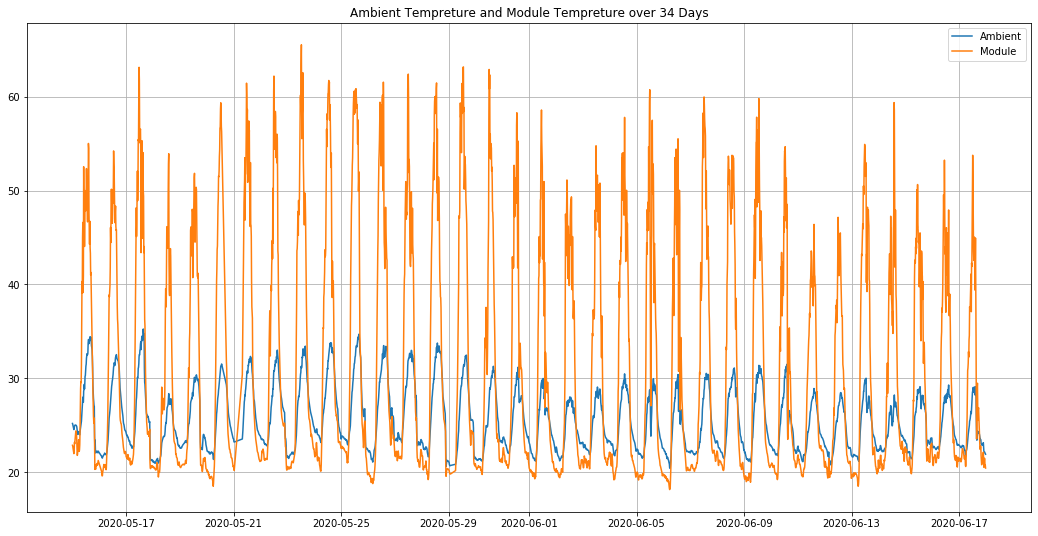

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(sense1.DATE_TIME,
        sense1.AMBIENT_TEMPERATURE,
        label='Ambient'
       )

ax.plot(sense1.DATE_TIME,
        sense1.MODULE_TEMPERATURE,
        label='Module'
       )

# ax.plot(sense1.DATE_TIME,
#         sense1.MODULE_TEMPERATURE-sense1.AMBIENT_TEMPERATURE,
#         label='Difference'
#        )

ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Ambient Tempreture and Module Tempreture over 34 Days')
#plt.xlabel('Ambient Tempreture')
#plt.ylabel('Module Tempreture')
plt.show()

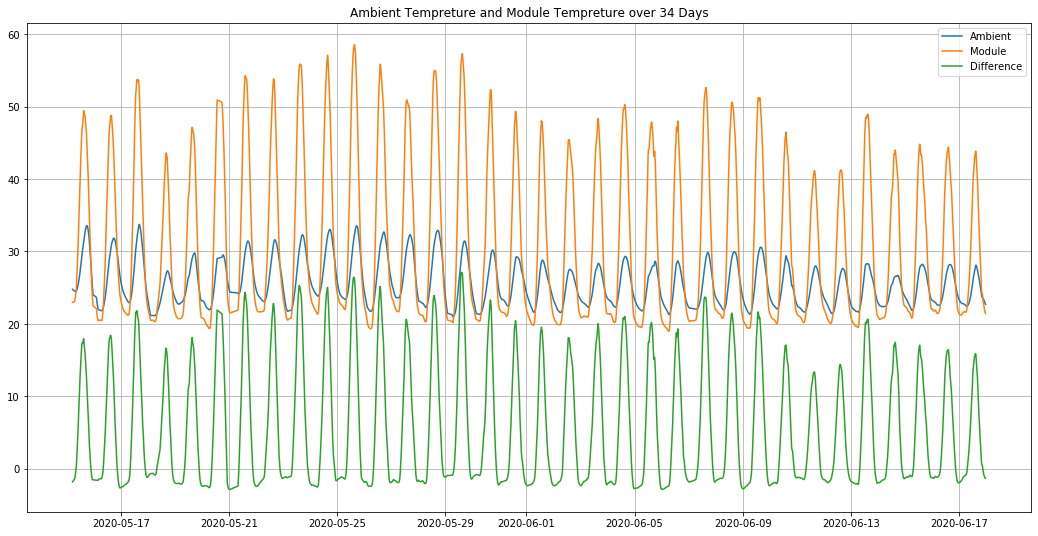

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(sense1.DATE_TIME,
        sense1.AMBIENT_TEMPERATURE.rolling(window=20).mean(),
        label='Ambient'
       )

ax.plot(sense1.DATE_TIME,
        sense1.MODULE_TEMPERATURE.rolling(window=20).mean(),
        label='Module'
       )

ax.plot(sense1.DATE_TIME,
        (sense1.MODULE_TEMPERATURE-sense1.AMBIENT_TEMPERATURE).rolling(window=20).mean(),
        label='Difference'
       )

# ax.plot(sense1.DATE_TIME,
#         sense1.IRRADIATION.rolling(window=20).mean()*10,
#         label='Ambient'
#        )

ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Ambient Tempreture and Module Tempreture over 34 Days')
#plt.xlabel('Ambient Tempreture')
#plt.ylabel('Module Tempreture')
plt.show()

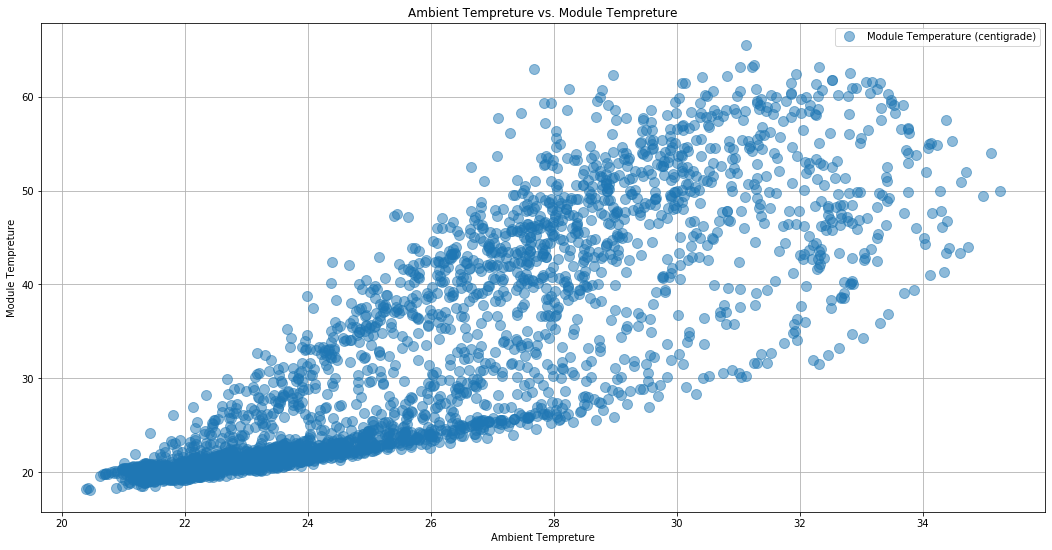

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(sense1.AMBIENT_TEMPERATURE,
        sense1.MODULE_TEMPERATURE,
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Module Temperature (centigrade)')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Ambient Tempreture vs. Module Tempreture')
plt.xlabel('Ambient Tempreture')
plt.ylabel('Module Tempreture')
plt.show()

In [ ]:
dates = sense1['DATE'].unique()

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


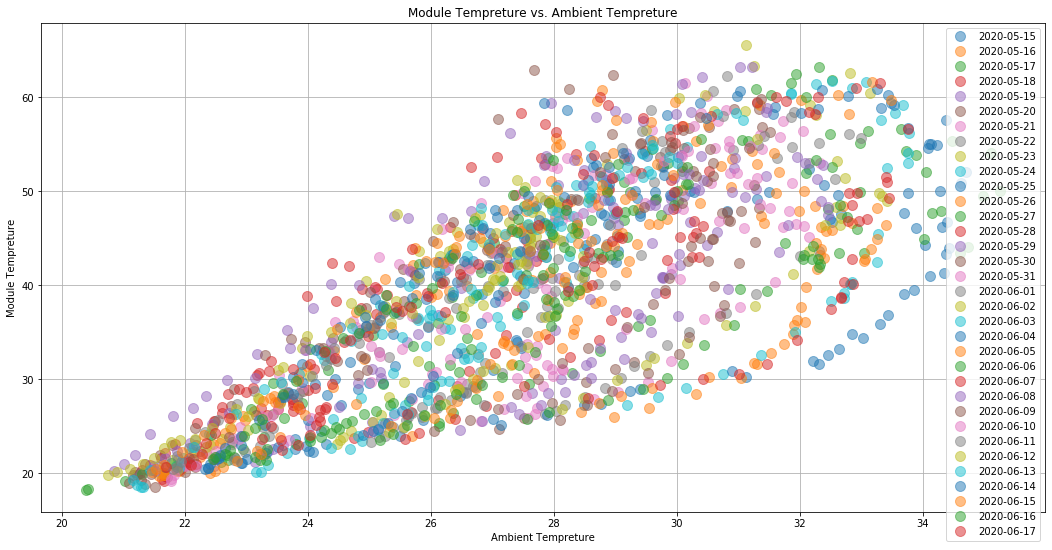

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))


#pd.to_datetime(pgen1['DATE'],format='%Y-%m-%d')

for date in dates:
    data = sense1[sense1['DATE']==date][sense1['IRRADIATION']>0]

    ax.plot(data.AMBIENT_TEMPERATURE,
            data.MODULE_TEMPERATURE,
            marker='o',
            linestyle='',
            alpha=.5,
            ms=10,
            label=pd.to_datetime(date,format='%Y-%m-%d').date()
           )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Module Tempreture vs. Ambient Tempreture')
plt.xlabel('Ambient Tempreture')
plt.ylabel('Module Tempreture')
plt.show()

In [ ]:
sense1[sense1['DATE']==date][sense1['IRRADIATION']==0].shape

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(44, 10)

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


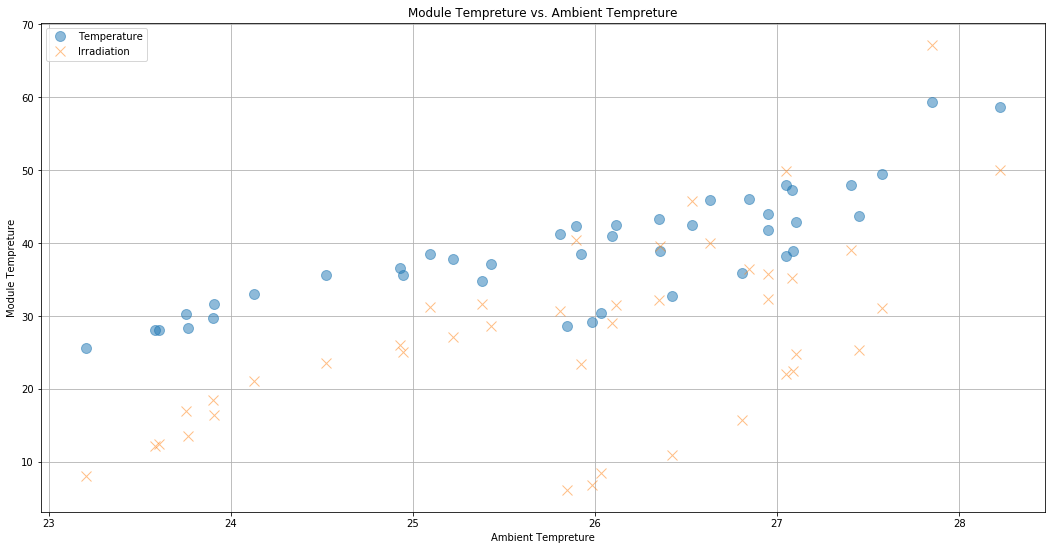

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

data = sense1[sense1['DATE']=='2020-06-14'][sense1['IRRADIATION']>0.1][sense1['HOUR']>6]

ax.plot(data.AMBIENT_TEMPERATURE,
        data.MODULE_TEMPERATURE,
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Temperature'
       )
ax.plot(data.AMBIENT_TEMPERATURE,
        data.IRRADIATION*55,
        marker='x',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Irradiation'
       )

ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Module Tempreture vs. Ambient Tempreture')
plt.xlabel('Ambient Tempreture')
plt.ylabel('Module Tempreture')
plt.show()

In [ ]:
data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,HOUR,MINUTES
2798,2020-06-14 00:00:00,4135001,HmiyD2TTLFNqkNe,22.309426,21.285647,0.0,2020-06-14,00:00:00,0,0
2799,2020-06-14 00:15:00,4135001,HmiyD2TTLFNqkNe,22.283628,20.812500,0.0,2020-06-14,00:15:00,0,15
2800,2020-06-14 00:30:00,4135001,HmiyD2TTLFNqkNe,22.417261,20.841431,0.0,2020-06-14,00:30:00,0,30
2801,2020-06-14 00:45:00,4135001,HmiyD2TTLFNqkNe,22.447643,20.779179,0.0,2020-06-14,00:45:00,0,45
2802,2020-06-14 01:00:00,4135001,HmiyD2TTLFNqkNe,22.339699,20.416589,0.0,2020-06-14,01:00:00,1,0
...,...,...,...,...,...,...,...,...,...,...
2889,2020-06-14 22:45:00,4135001,HmiyD2TTLFNqkNe,23.522461,21.420634,0.0,2020-06-14,22:45:00,22,45
2890,2020-06-14 23:00:00,4135001,HmiyD2TTLFNqkNe,23.386562,21.151996,0.0,2020-06-14,23:00:00,23,0
2891,2020-06-14 23:15:00,4135001,HmiyD2TTLFNqkNe,23.331081,21.470425,0.0,2020-06-14,23:15:00,23,15
2892,2020-06-14 23:30:00,4135001,HmiyD2TTLFNqkNe,23.444953,22.455490,0.0,2020-06-14,23:30:00,23,30


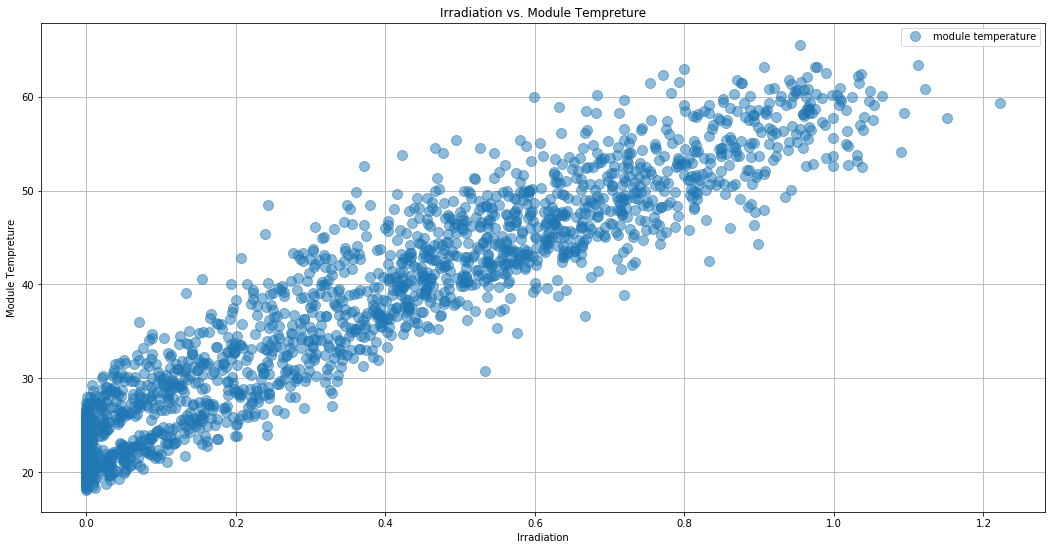

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(sense1['IRRADIATION'],
        sense1['MODULE_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='module temperature')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Irradiation vs. Module Tempreture')
plt.xlabel('Irradiation')
plt.ylabel('Module Tempreture')
plt.show()

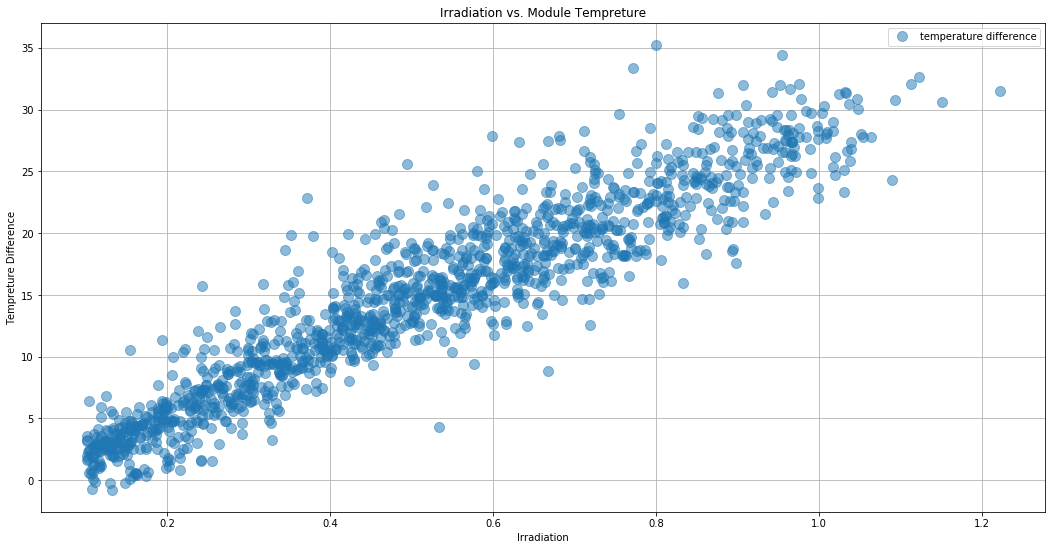

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

data = sense1[sense1['IRRADIATION']>0.1]
ax.plot(data['IRRADIATION'],
        data['MODULE_TEMPERATURE']-data['AMBIENT_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='temperature difference')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Irradiation vs. Module Tempreture')
plt.xlabel('Irradiation')
plt.ylabel('Tempreture Difference')
plt.show()

In [ ]:
data.shape
sense1.shape

(3182, 10)

In [ ]:
inv_summary = pgen1.groupby(['SOURCE_KEY','DAY']).agg(DAILY_YIELD = ('DAILY_YIELD',max),INV = ('SOURCE_KEY', max),TOTAL_YIELD = ('TOTAL_YIELD',max))

In [ ]:
plt.bar(inv_lst,pgen1.groupby('SOURCE_KEY')['TOTAL_YIELD'].max())
plt.xticks(rotation=90)
plt.grid()

In [ ]:
inv_summary

In [ ]:
inv_lst = pgen1['SOURCE_KEY'].unique()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for inv in inv_lst:
    temp_df = pgen1[pgen1['SOURCE_KEY']==inv].groupby('DAY').agg(DAILY_YIELD = ('DAILY_YIELD',max))
    ax.plot(temp_df,
            label=inv)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Yield Comparison over Time')
plt.ylabel('Yield')
plt.xlabel('Day')
plt.show()
    

In [ ]:

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 12))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="DAILY_YIELD", y="INV", data=inv_summary,
            whis=[0, 100], palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="DAILY_YIELD", y="INV", data=inv_summary,
              size=2, linewidth=0.5)

# Tweak the visual presentation
#ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.grid()
ax.margins(0.01)
ax.set(ylabel="Inverters")
sns.despine(trim=True, left=True)

In [ ]:
pgen1.head()

In [ ]:
sense1.head(50)

In [ ]:
sense1['DAY'].unique()

In [ ]:
sense1_summary = sense1.groupby(['SOURCE_KEY','DAY']).agg(DAILY_YIELD = ('DAILY_YIELD',max),INV = ('SOURCE_KEY', max))

In [ ]:
result_left = pd.merge(pgen1,
                 sense1[['DATE_TIME','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']],
                 on='DATE_TIME', 
                 how='left')

In [ ]:
result_left.head()

In [ ]:
result_left['AMBIENT_TEMPERATURE'].isnull().value_counts()

In [ ]:
temp_null.shape

In [ ]:
result_left[result_left['AMBIENT_TEMPERATURE'].isnull()]

In [ ]:
result_left[result_left['AMBIENT_TEMPERATURE'].isnull()]['DAY'].unique()

In [ ]:
sense1[sense1['DAY']==6]

In [ ]:
pgen1[pgen1['DAY']==6]

In [ ]:
pgen1['DAY'].value_counts()

----


In [ ]:
Dates as rows
Times as columns
Values are count of observations

In [ ]:
data_summary = pgen1.groupby(['SOURCE_KEY','DATE']).agg(READINGS = ('TOTAL_YIELD','count'),
                                                  INV = ('SOURCE_KEY', max),
                                                  DATE = ('DATE',max)
                                                 )

In [ ]:
data_summary.head()

READINGS              INV       DATE
SOURCE_KEY      DATE                                            
1BY6WEcLGh8j5v7 2020-05-15        93  1BY6WEcLGh8j5v7 2020-05-15
                2020-05-16        88  1BY6WEcLGh8j5v7 2020-05-16
                2020-05-17        96  1BY6WEcLGh8j5v7 2020-05-17
                2020-05-18        96  1BY6WEcLGh8j5v7 2020-05-18
                2020-05-19        93  1BY6WEcLGh8j5v7 2020-05-19

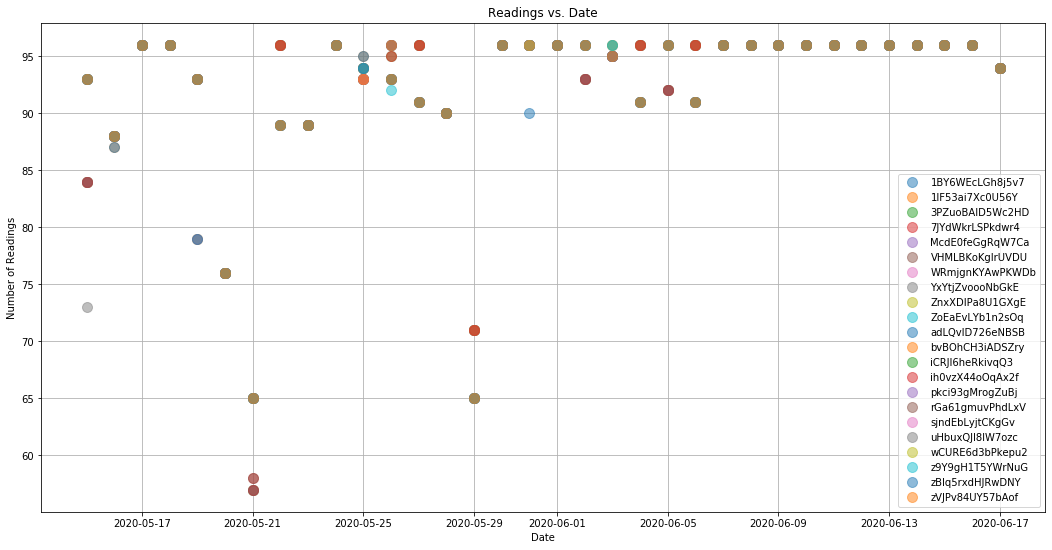

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

for inv in data_summary['INV'].unique():

    ax.plot(data_summary[data_summary['INV']==inv]['DATE'],
            data_summary[data_summary['INV']==inv]['READINGS'],
            marker='o',
            linestyle='',
            alpha=.5,
            ms=10,
            label=inv)
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Readings vs. Date')
plt.xlabel('Date')
plt.ylabel('Number of Readings')
plt.show()

----

In [ ]:
result_left = pd.merge(pgen1,sense1, on='DATE_TIME',how='left')

In [ ]:
result_left.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_x,TIME_x,HOUR_x,MINUTES_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_y,TIME_y,HOUR_y,MINUTES_y
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00,0.0,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00,0.0,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00,0.0,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00,0.0,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00,0.0,0.0


In [ ]:
result_left.iloc[:,15].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: IRRADIATION, dtype: float64

In [ ]:
result_left.shape

(68778, 20)

In [ ]:
pgen1.shape

(68778, 11)

In [ ]:
result_left['AMBIENT_TEMPERATURE'].isnull().value_counts()

False    68774
True         4
Name: AMBIENT_TEMPERATURE, dtype: int64

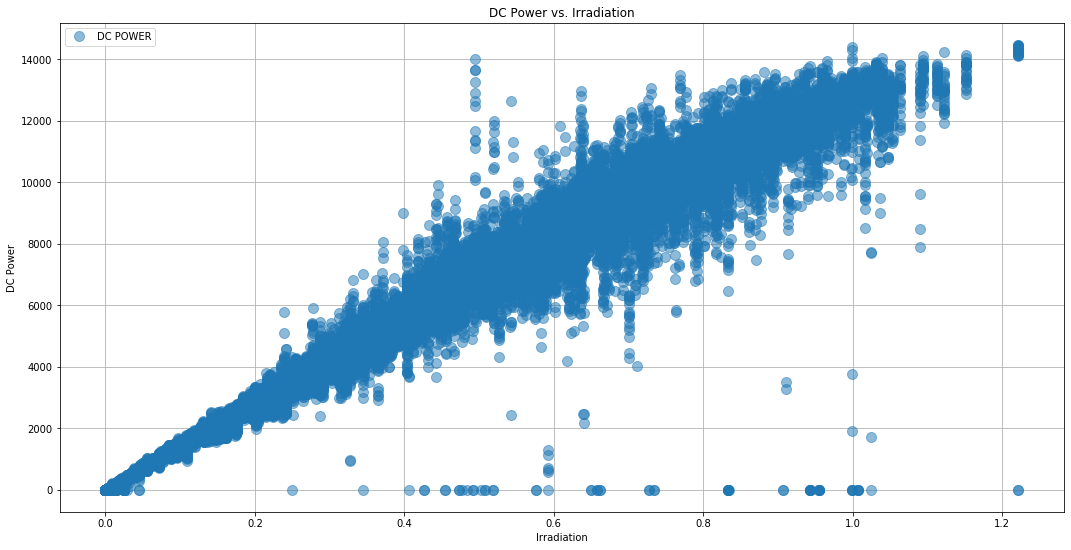

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(result_left.IRRADIATION,
        result_left.DC_POWER,
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='DC POWER')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('DC Power vs. Irradiation')
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.show()

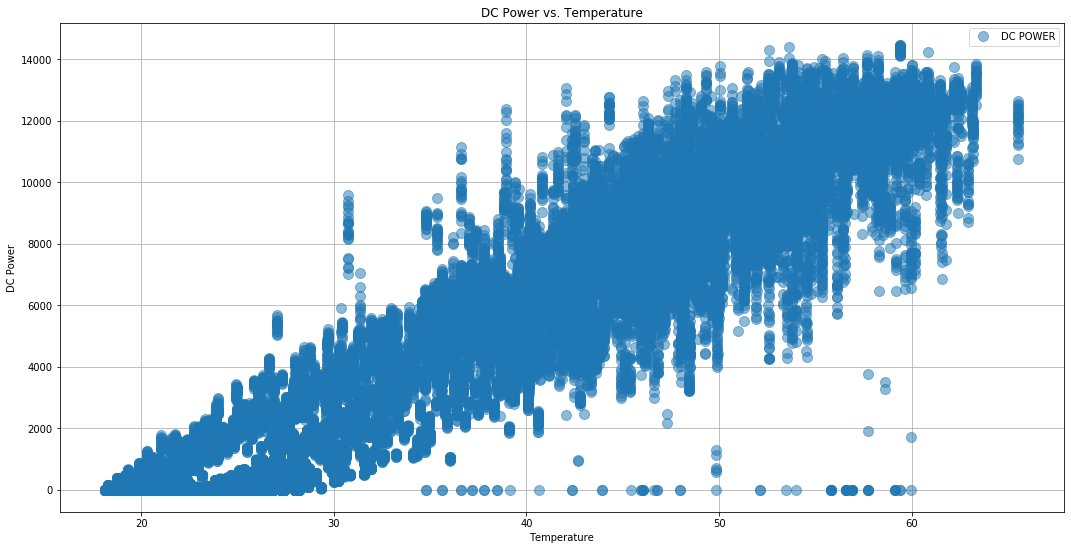

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(result_left.MODULE_TEMPERATURE,
        result_left.DC_POWER,
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='DC POWER')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('DC Power vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('DC Power')
plt.show()

In [ ]:
dates = result_left['DATE_x'].unique()

In [ ]:
dates

array(['2020-05-15T00:00:00.000000000', '2020-05-16T00:00:00.000000000',
       '2020-05-17T00:00:00.000000000', '2020-05-18T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2020-05-20T00:00:00.000000000',
       '2020-05-21T00:00:00.000000000', '2020-05-22T00:00:00.000000000',
       '2020-05-23T00:00:00.000000000', '2020-05-24T00:00:00.000000000',
       '2020-05-25T00:00:00.000000000', '2020-05-26T00:00:00.000000000',
       '2020-05-27T00:00:00.000000000', '2020-05-28T00:00:00.000000000',
       '2020-05-29T00:00:00.000000000', '2020-05-30T00:00:00.000000000',
       '2020-05-31T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-06-02T00:00:00.000000000', '2020-06-03T00:00:00.000000000',
       '2020-06-04T00:00:00.000000000', '2020-06-05T00:00:00.000000000',
       '2020-06-06T00:00:00.000000000', '2020-06-07T00:00:00.000000000',
       '2020-06-08T00:00:00.000000000', '2020-06-09T00:00:00.000000000',
       '2020-06-10T00:00:00.000000000', '2020-06-11

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


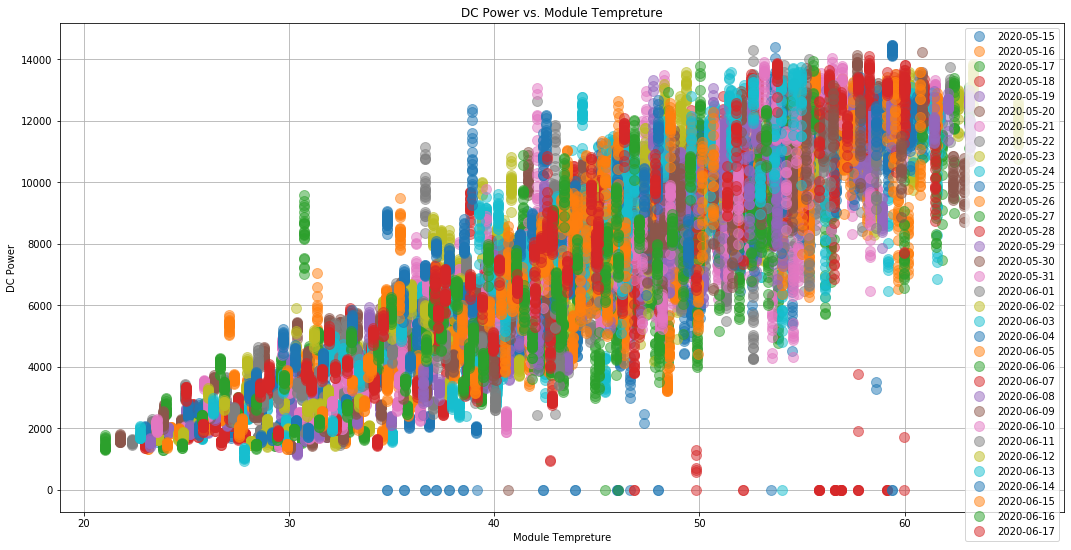

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))


#pd.to_datetime(pgen1['DATE'],format='%Y-%m-%d')

for date in dates:
    data = result_left[result_left['DATE_x']==date][result_left['IRRADIATION']>0.1]

    ax.plot(data.MODULE_TEMPERATURE,
            data.DC_POWER,
            marker='o',
            linestyle='',
            alpha=.5,
            ms=10,
            label=pd.to_datetime(date,format='%Y-%m-%d').date()
           )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('DC Power vs. Module Tempreture')
plt.xlabel('Module Tempreture')
plt.ylabel('DC Power')
plt.show()

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


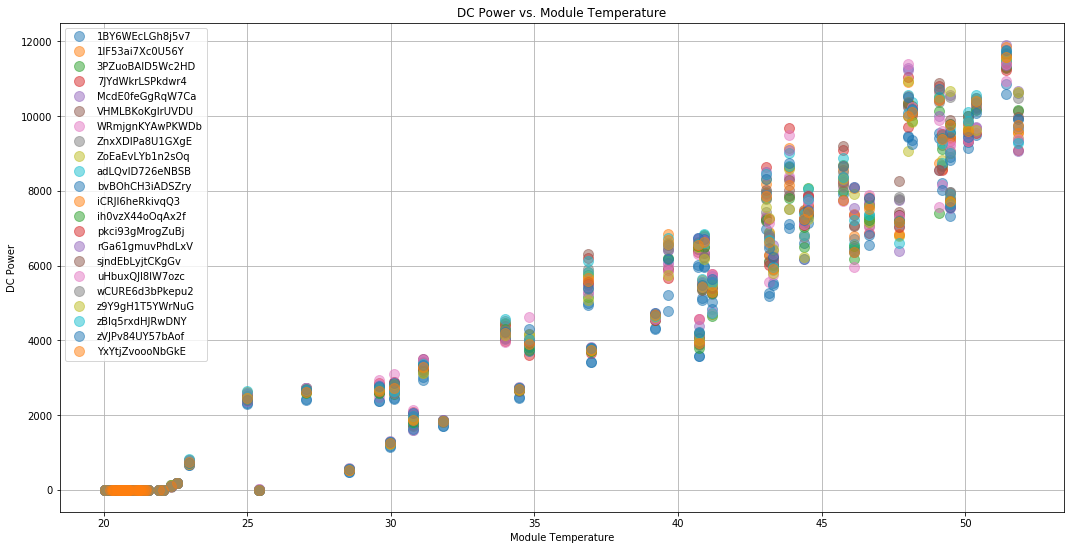

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

date = dates[4]
inverters = result_left['SOURCE_KEY_x'].unique()

for inverter in inverters:

    data = result_left[result_left['DATE_x']==date][result_left['SOURCE_KEY_x']==inverter]#[result_left['IRRADIATION']>0.1]

    ax.plot(data.MODULE_TEMPERATURE,
                data.DC_POWER,
                marker='o',
                linestyle='',
                alpha=.5,
                ms=10,
                label=inverter
               )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('DC Power vs. Module Temperature')
plt.xlabel('Module Temperature')
plt.ylabel('DC Power')
plt.show()

In [ ]:
data

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_x,TIME_x,HOUR_x,MINUTES_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_y,TIME_y,HOUR_y,MINUTES_y
8112,2020-05-19 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,624.750000,6283648.0,2020-05-19,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,22.610982,20.609906,0.0,2020-05-19,00:00:00,0.0,0.0
8113,2020-05-19 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000000,6209806.0,2020-05-19,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,22.610982,20.609906,0.0,2020-05-19,00:00:00,0.0,0.0
8114,2020-05-19 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,679.375000,7013918.0,2020-05-19,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,22.610982,20.609906,0.0,2020-05-19,00:00:00,0.0,0.0
8115,2020-05-19 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,758.428571,7628372.0,2020-05-19,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,22.610982,20.609906,0.0,2020-05-19,00:00:00,0.0,0.0
8116,2020-05-19 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000000,7185091.0,2020-05-19,00:00:00,0,0,4135001.0,HmiyD2TTLFNqkNe,22.610982,20.609906,0.0,2020-05-19,00:00:00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10097,2020-05-19 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,6997.000000,7071198.0,2020-05-19,23:45:00,23,45,4135001.0,HmiyD2TTLFNqkNe,22.638493,20.296448,0.0,2020-05-19,23:45:00,23.0,45.0
10098,2020-05-19 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,2981.142857,6815349.0,2020-05-19,23:45:00,23,45,4135001.0,HmiyD2TTLFNqkNe,22.638493,20.296448,0.0,2020-05-19,23:45:00,23.0,45.0
10099,2020-05-19 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,6892.000000,7040465.0,2020-05-19,23:45:00,23,45,4135001.0,HmiyD2TTLFNqkNe,22.638493,20.296448,0.0,2020-05-19,23:45:00,23.0,45.0
10100,2020-05-19 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,6924.000000,6371971.0,2020-05-19,23:45:00,23,45,4135001.0,HmiyD2TTLFNqkNe,22.638493,20.296448,0.0,2020-05-19,23:45:00,23.0,45.0


In [ ]:
# X = result_left['IRRADIATION']
# y = result_left['DC_POWER']

result_left['IRRADIATION'] = result_left['IRRADIATION'].fillna(0)
result_left['AMBIENT_TEMPERATURE'] = result_left['AMBIENT_TEMPERATURE'].fillna(0)
result_left['MODULE_TEMPERATURE'] = result_left['MODULE_TEMPERATURE'].fillna(0)

X = result_left.iloc[:, 15:16].values #Irradiation
y = result_left.iloc[:, 3].values #DC_Power

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
lin_reg.coef_

array([13223.52483583])

In [ ]:
from sklearn import metrics
# print("Train set Accuracy: ", lin_reg.score(y_train, lin_reg.predict(X_train)))
# print("Test set Accuracy: ", score(y_test, yhat))

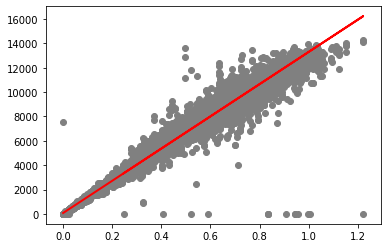

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_df.head(10)

,Actual,Predicted
0,0.000000,75.706648
1,5098.750000,4754.227351
2,0.000000,75.706648
3,0.000000,75.706648
4,0.000000,75.706648
5,1783.625000,1693.692033
6,0.000000,75.706648
7,6911.000000,6478.908240
8,0.000000,75.706648
9,8467.571429,7694.841675


In [ ]:

print("Train Set Accuracy")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))
print('---------------------------')
print("Test Set Accuracy")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Set Accuracy
Mean Absolute Error: 273.0509214595616
Mean Squared Error: 346619.7430997916
Root Mean Squared Error: 588.7442085488328
---------------------------
Test Set Accuracy
Mean Absolute Error: 264.9128349037721
Mean Squared Error: 348475.8147497292
Root Mean Squared Error: 590.3184011613811


In [ ]:
result_left['DC_POWER'].mean()

3147.4262112269266

In [ ]:
588/3147*100

18.684461391801715

In [ ]:
X = result_left[['IRRADIATION','MODULE_TEMPERATURE']]
y = result_left['DC_POWER']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns = ['Coefficients'])
coeff_df

,Coefficients
IRRADIATION,12660.758963
MODULE_TEMPERATURE,14.352132


In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_df.head(10)

,Actual,Predicted
53900,0.000000,51.750638
47072,5098.750000,4770.048767
33512,0.000000,42.664459
62165,0.000000,81.353488
50208,0.000000,40.770610
32527,1783.625000,1751.253460
28980,0.000000,52.273804
28269,6911.000000,6569.096302
6287,0.000000,57.163259
61525,8467.571429,7552.040814


In [ ]:
print("Train Set Accuracy")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))
print('---------------------------')
print("Test Set Accuracy")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Set Accuracy
Mean Absolute Error: 267.62975412872083
Mean Squared Error: 344257.33613455127
Root Mean Squared Error: 586.7344681664366
---------------------------
Test Set Accuracy
Mean Absolute Error: 259.34628772976674
Mean Squared Error: 346133.36010949174
Root Mean Squared Error: 588.3309953669717


In [ ]:
lin_reg.predict([[0.4,50]]) #0.4 irradiation and 50 degrees of module temperature

array([5539.89366297])

Create a day-wise summary

In [ ]:
# day_summary = result_left.groupby(['DATE_x','SOURCE_KEY_x']).agg(DAILY_YIELD = ('DAILY_YIELD',max),
#                                                   TOTAL_IRRADIANCE = ('IRRADIATION', sum),
#                                                   DATE = ('DATE_y',max)
#                                                  )

In [ ]:
day_summary = sense1.groupby('DATE').agg(TOTAL_IRRADIANCE = ('IRRADIATION', sum),
                                         DATE = ('DATE',max)
                                        )

In [ ]:
import fbprophet

In [ ]:
# Prophet requires columns ds (Date) and y (value)
day_summary = day_summary.rename(columns={'DATE': 'ds', 'TOTAL_IRRADIANCE': 'y'})

In [ ]:
day_summary

,y,ds
DATE,,
2020-05-15,19.037010,2020-05-15
2020-05-16,18.651690,2020-05-16
2020-05-17,22.931378,2020-05-17
2020-05-18,15.266485,2020-05-18
2020-05-19,18.044861,2020-05-19
2020-05-20,18.245542,2020-05-20
2020-05-21,23.556170,2020-05-21
2020-05-22,22.119123,2020-05-22
2020-05-23,26.106652,2020-05-23


In [ ]:
# Make the prophet model and fit on the data
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.25)
gm_prophet.fit(day_summary)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [ ]:
# Make a future dataframe for 1 month
gm_forecast = gm_prophet.make_future_dataframe(periods=30, freq='D')
# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)

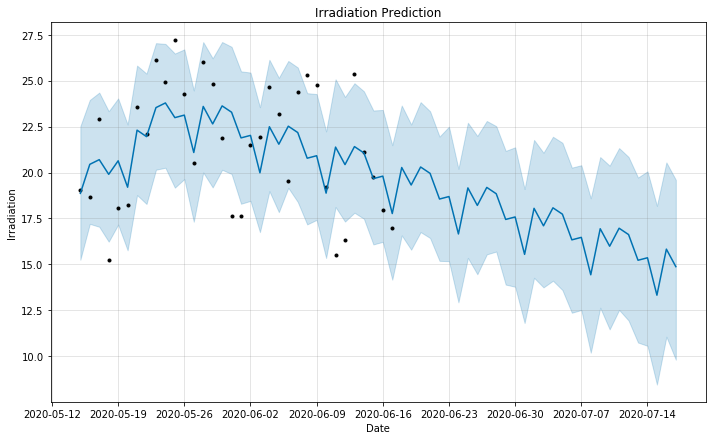

In [ ]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Irradiation')
plt.title('Irradiation Prediction');

In [ ]:
gm_forecast['ds'].value_counts().head(40)

2020-06-14    22
2020-05-15    22
2020-06-05    22
2020-05-25    22
2020-06-11    22
2020-06-17    22
2020-05-20    22
2020-06-06    22
2020-05-26    22
2020-06-12    22
2020-06-01    22
2020-06-16    22
2020-05-21    22
2020-06-07    22
2020-05-27    22
2020-06-13    22
2020-05-16    22
2020-06-02    22
2020-05-22    22
2020-06-08    22
2020-05-19    22
2020-05-31    22
2020-05-30    22
2020-06-04    22
2020-05-17    22
2020-06-03    22
2020-05-23    22
2020-06-09    22
2020-05-29    22
2020-06-15    22
2020-05-18    22
2020-05-28    22
2020-06-10    22
2020-05-24    22
2020-07-01     1
2020-07-17     1
2020-07-09     1
2020-06-22     1
2020-06-30     1
2020-07-07     1
Name: ds, dtype: int64

In [ ]:
sense1_renamed = sense1.rename(columns={'DATE_TIME': 'ds', 'IRRADIATION': 'y'})

In [ ]:
#import fbprophet

# Make the prophet model and fit on the data
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.25)
gm_prophet.fit(sense1_renamed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
# Make a future dataframe for 1 month
gm_forecast = gm_prophet.make_future_dataframe(periods=96, freq='H')
# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)

Text(0.5, 1, 'Irradiation Prediction')

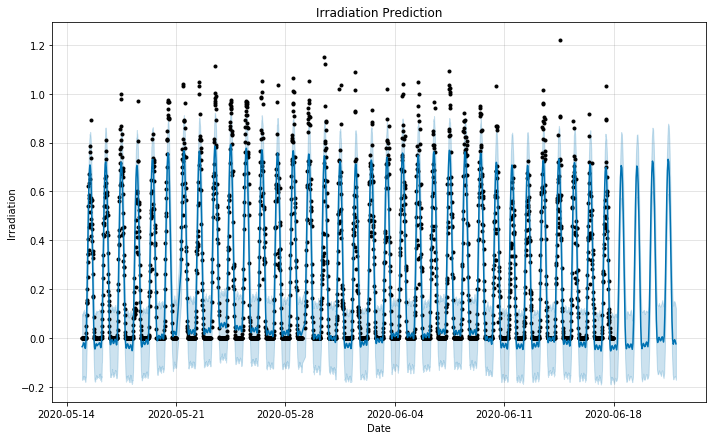

In [ ]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Irradiation')
plt.title('Irradiation Prediction')

In [ ]:
gm_forecast.tail(50)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3228,2020-06-19 22:45:00,0.199837,-0.160514,0.116018,0.181058,0.220673,-0.227034,-0.227034,-0.227034,-0.223828,-0.223828,-0.223828,-0.003206,-0.003206,-0.003206,0.0,0.0,0.0,-0.027196
3229,2020-06-19 23:45:00,0.199840,-0.174060,0.106258,0.180024,0.221395,-0.235484,-0.235484,-0.235484,-0.233191,-0.233191,-0.233191,-0.002293,-0.002293,-0.002293,0.0,0.0,0.0,-0.035644
3230,2020-06-20 00:45:00,0.199843,-0.162109,0.098502,0.179547,0.222372,-0.233277,-0.233277,-0.233277,-0.231961,-0.231961,-0.231961,-0.001316,-0.001316,-0.001316,0.0,0.0,0.0,-0.033434
3231,2020-06-20 01:45:00,0.199846,-0.148088,0.129424,0.178946,0.222958,-0.221801,-0.221801,-0.221801,-0.221521,-0.221521,-0.221521,-0.000280,-0.000280,-0.000280,0.0,0.0,0.0,-0.021955
3232,2020-06-20 02:45:00,0.199849,-0.151157,0.118997,0.178250,0.223531,-0.216388,-0.216388,-0.216388,-0.217198,-0.217198,-0.217198,0.000811,0.000811,0.000811,0.0,0.0,0.0,-0.016539
3233,2020-06-20 03:45:00,0.199852,-0.165143,0.111812,0.177663,0.224343,-0.226066,-0.226066,-0.226066,-0.228014,-0.228014,-0.228014,0.001948,0.001948,0.001948,0.0,0.0,0.0,-0.026214
3234,2020-06-20 04:45:00,0.199854,-0.171803,0.103095,0.177147,0.225072,-0.235677,-0.235677,-0.235677,-0.238801,-0.238801,-0.238801,0.003125,0.003125,0.003125,0.0,0.0,0.0,-0.035822
3235,2020-06-20 05:45:00,0.199857,-0.152016,0.128267,0.176589,0.225871,-0.210342,-0.210342,-0.210342,-0.214675,-0.214675,-0.214675,0.004333,0.004333,0.004333,0.0,0.0,0.0,-0.010485
3236,2020-06-20 06:45:00,0.199860,-0.063068,0.220039,0.176064,0.226483,-0.121069,-0.121069,-0.121069,-0.126634,-0.126634,-0.126634,0.005565,0.005565,0.005565,0.0,0.0,0.0,0.078791
3237,2020-06-20 07:45:00,0.199863,0.083507,0.369158,0.175315,0.227114,0.030356,0.030356,0.030356,0.023545,0.023545,0.023545,0.006812,0.006812,0.006812,0.0,0.0,0.0,0.230220


In [ ]:
sense1.shape

(3182, 10)